# NLP
## Word2Vec with Gensim

- Tutorial from [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

- Word2Vec model, based on given sentence/corpus's context, convert the words into high demensional vectors, so it can be fed into neural nets
- Here, we'll use movie review text from NLTK

In [1]:
## Importing the tools, NLTK and gensim
from nltk.corpus import movie_reviews
from gensim.models import Word2Vec
from gensim import models
# movie_reviews.sents() return sentences from the 
# review, and we'll feed it into the Word2Vec
# and training the vec
mr = Word2Vec(movie_reviews.sents())

In [2]:
print(movie_reviews.sents())
print(mr)

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]
Word2Vec(vocab=14794, size=100, alpha=0.025)


### Constructing Word2Vec

Learning a word embedding from text includes

- tokenizing the sentences into words
- providing them to the constructor of `Word2Vec()`
- **Parameters of the constructors are**
    * **size**(default 100): number of dimensions of teh embedding/vectors to represent each word
    * **window**(default 5): The max distance between a target word and words around the target word
    * **min_count**(default 5): The min count of words to consider when training the model; words with an occurrence less than this count will be ignored
    * **workers**(default 3): the number of threads to use while training
    * **sg**(default 0 or CBOW): the training algorithm to use, CBOW(0) or skip gram(1)
    
#### After the training is complete...
you can access it through `.wv`. 
Let's take a look at the words in the vectors

In [3]:
words = list(mr.wv.vocab)
print(words)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'see', 'him', 'in', 'her', 'life', 'has', 'nightmares', 'what', "'", 's', 'deal', '?', 'watch', 'movie', '"', 'sorta', 'find', 'out', 'critique', 'mind', '-', 'fuck', 'for', 'generation', 'that', 'touches', 'on', 'very', 'cool', 'idea', 'presents', 'it', 'bad', 'package', 'which', 'is', 'makes', 'this', 'review', 'even', 'harder', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'with', 'your', 'head', 'such', '(', 'lost', 'highway', '&', 'memento', ')', 'there', 'are', 'good', 'ways', 'making', 'all', 'types', 'these', 'folks', 'just', 'didn', 't', 'correctly', 'seem', 'have', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'so', 'problems', 'well', 'its', 'main', 'problem', 'simply', 'too', 'jum

**You can also view the vector corresponding to chosen word.**

In [9]:
print(mr['love'])

[-0.17395006 -0.344255   -0.5603437  -0.3186592  -1.6837767  -0.7142487
 -0.05563695 -0.30096465  0.32622167  0.72564286 -1.0734779  -0.48032483
 -1.1606141   0.23769817  1.4286965   1.2955862   0.88690615  0.18576205
  0.51947814 -0.53612053 -1.0778928  -0.40194786  0.7621985   0.34562254
 -0.03270479 -0.7214752   0.46593603 -0.19496846  1.2416502  -1.8062776
 -2.075597    0.36802486  0.22415325  0.7348562   0.2900228   0.54186815
  1.1684132  -0.6009052  -0.9021324  -0.35822672  0.33521748  0.3277216
  0.5521875  -1.3884866   0.18940984  0.41728404 -0.00353415  0.40414798
 -1.8479843   0.1596884   0.3239745  -0.7337387  -0.17960146 -0.46932048
  1.8467728  -0.08840408 -0.31659064 -0.15768418  0.37966603 -1.8435769
  1.0342274   0.44148117 -1.1670402   0.03584862  0.48919272 -0.1682903
 -1.0692248  -0.19184431  1.5827516   0.7249189  -0.7625911   0.73806065
 -0.2457144   0.6785216  -0.74797684  1.0113446  -1.3353933   0.36539713
  0.25856435 -1.0810697   0.8074761  -0.4122077  -0.2239

/home/wataru/anaconda3/envs/ML_projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### Saving and Loading the model
- the model can be saved using 
`model.wv.save_word2vec_format('model.bin')`
- it can be saved in non binary format for easy review, just set the binary == False
`model.wv.save_word2vec_format('model.txt', binary=False)`

**Model can be loaded in 2 ways, depends on file format**
- use `model = Word2Vec.load('model.bin')` if it's saved in binary
- use `model = model.KeyedVectors.load_word2vec_format('model.txt')` if not in the binary

In [14]:
## Saving the model in both format
mr.wv.save_word2vec_format('model.bin')
mr.wv.save_word2vec_format('model.txt', binary=False)

In [5]:
# Loading the models
model = models.KeyedVectors.load_word2vec_format('model.bin')
#print(model.wv.vocab)
print(model)

## Visualize Word Embedding
Classical projection methods can be used, to reduce the high-dimensional word vectors to 2D plots.

all of the vectors from a models can be retrieved 
```python
X = model[model.wv.vocab]
```


In [6]:
X = model[model.wv.vocab]
print('X', X.shape)
print(X)

X (14794, 100)
[[-5.3394699e-01  4.9209157e-01 -9.8457915e-01 ...  8.0292040e-01
  -2.0488380e-01 -1.0682490e+00]
 [ 3.5958728e-01 -7.7183509e-01 -6.2444788e-01 ... -3.6513895e-01
   9.7996026e-01  3.5807261e-01]
 [-2.2211561e+00  1.2534231e+00  2.7112564e-01 ... -3.6099339e-01
  -5.0435901e-01  6.9970533e-02]
 ...
 [-4.7871992e-03 -3.4394305e-02 -1.5265916e-02 ...  8.3140325e-04
   2.2705505e-02  6.1594523e-03]
 [ 8.0783516e-02 -5.6102961e-02  9.5359564e-02 ...  8.9048266e-02
  -8.3283447e-03 -4.6770513e-02]
 [ 7.2484287e-03 -2.1563748e-02  8.5180722e-02 ...  8.2981765e-02
   1.0207973e-02 -3.4197710e-02]]


/home/wataru/anaconda3/envs/ML_projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


### Plot Word Vector using PCA
- we'll use scikit-learn library to create and plot PCA

In [7]:
## Import Sklearn
from sklearn.decomposition import PCA

# construct the PCA object, with 2 dimensions
pca = PCA(n_components=2)

# fit it with the data
result = pca.fit_transform(X)
print('result: ', result.shape)
print(result)

result:  (14794, 2)
[[ 1.176933    1.4968709 ]
 [ 2.730874    0.94748867]
 [ 1.633601    0.49243093]
 ...
 [ 0.01161466 -0.64906275]
 [-0.20005302 -0.53659374]
 [-0.17934169 -0.48047522]]


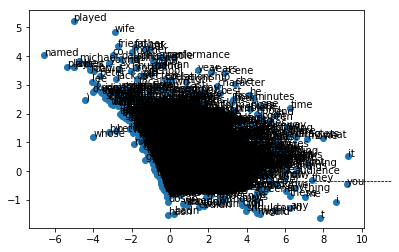

In [9]:
## The result can be plotted using matplotlib
import matplotlib.pyplot as plt

# Creating scatter plot
plt.scatter(result[:, 0], result[:, 1])

## Let's label the points with words
words = list(model.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()